In [1]:
# read the iris data into a DataFrame
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [5]:
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [2]:

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [3]:
# create a custom colormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


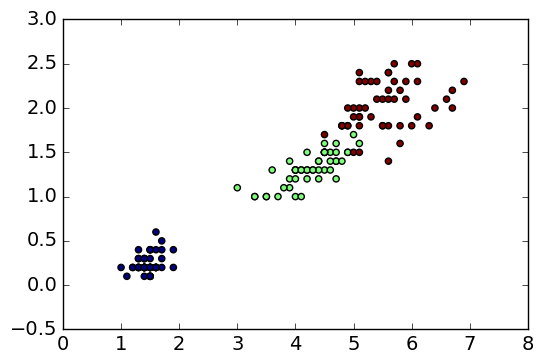

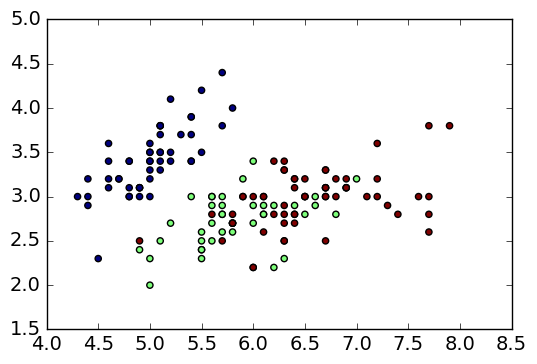

In [4]:
# map each iris species to a number
# let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column caled 'species_num'
species_num = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris['species_num'] = iris.species.map(species_num)

# create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
fig = plt.scatter(iris.petal_length, iris.petal_width, c=iris.species_num)
plt.show()
# create a scatter plot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
fig2 = plt.scatter(iris.sepal_length, iris.sepal_width, c=iris.species_num)
plt.show()

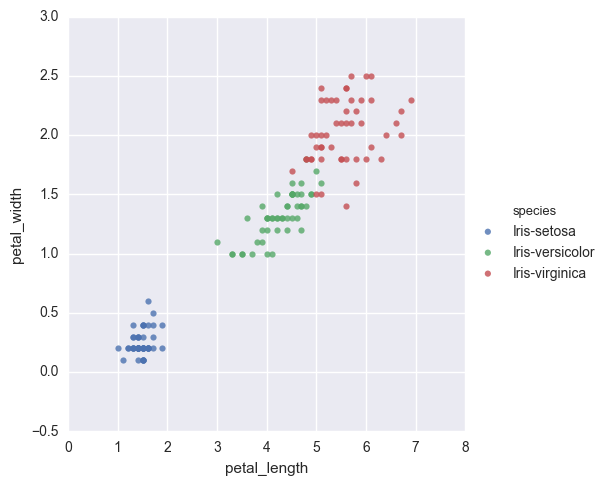

In [7]:
import seaborn as sns
sns.lmplot(x = 'petal_length', y = 'petal_width', data = iris, hue = 'species',fit_reg=False)

## KNN Modeling

### store feature matrix in "X"

In [9]:
features = ['sepal_width','sepal_length','petal_width','petal_length']
X = iris[features]
X.head()

,sepal_width,sepal_length,petal_width,petal_length
0,3.5,5.1,0.2,1.4
1,3.0,4.9,0.2,1.4
2,3.2,4.7,0.2,1.3
3,3.1,4.6,0.2,1.5
4,3.6,5.0,0.2,1.4


### store response vector in "y"

In [10]:
y = iris.species_num
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species_num, dtype: int64

### Make use of train, test, split

In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

### import KNN from SKLearn, instatiate a model with one neighbor

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### check the accuracy

In [13]:
knn.score(X_test, y_test)

0.92105263157894735

### create a model with 5 neighbors. Did it improve?

In [14]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(X_train, y_train)
knn5.score(X_test, y_test)

0.97368421052631582

###  create a looped function that will check all levels of various neighbors. Implement it.

3 0.973684210526


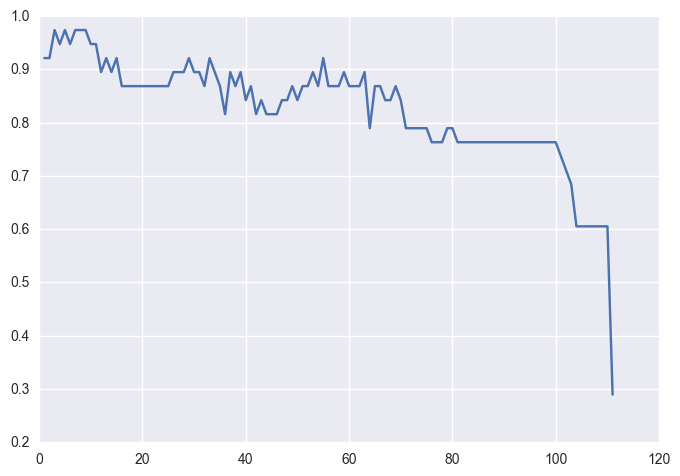

In [15]:
k_scores = {}
best_score = 0
best_k = 0
for i in range(1,len(X_train)):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    k_scores[i] = score
    if score > best_score:
        best_score = score
        best_k = i
print best_k, best_score

plt.plot(k_scores.keys(), k_scores.values())


### Bonus: according to SKLearn documentation, what is 'knn.predict_proba(X_new)' going to do?

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn.predict_proba()



Returns the probability esitamtes of Y_new using X_new.  Essentially it is giving us some logistic regression type feedback in that rather than giving us your what it thinks an observation is going to be classified as, it gives us its certanty probability associated with said classification.

In [18]:
pwd

u'/Users/General_Assembly/Desktop'